In [1]:

#NAME: MUHAMMAD SHEHROZ WALI KHAN
#ROLL NO: I170308


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
#Problem 1 

In [4]:
data=pd.read_csv("iris.data")
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [5]:
from sklearn import preprocessing

In [6]:
feature_columns=['SepalLength','SepalWidth','PetalLength','PetalWidth']
X = data[feature_columns].values
Y = data['Class'].values
le = preprocessing.LabelEncoder()
Y= le.fit_transform(Y)


In [7]:
class KNN:
   
    def __init__(self, k, scalefeatures=False):            
        self.k=k
        pass    

    def compute_distances(self, X):
        test1 = X.shape[0]
        train1 = self.X_train.shape[0]
        dists = np.zeros((test1, train1),dtype=float)
        for i in range(test1): 
            dists[i,:] = np.sqrt(np.sum(np.square(X[i,:]-self.X_train), axis=1))
        #print(dists)
        return dists
    
    def train(self, X, Y):
        
        nexamples,nfeatures=X.shape
        nexamples= X
        nfeatures= Y
        self.X_train=nexamples
        self.Y_train=nfeatures
        #print(self.Y_train)

   
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0], dtype = self.Y_train.dtype)
        pclass=[]
        compute_distance = self.compute_distances(X)
        for j in range(0,X.shape[0]):
            closedisty=[]
            sortx=np.argsort(compute_distance[j,:])
            closedisty=self.Y_train[sortx[:min(self.k,len(sortx))]]
            cnt={}
            for y in closedisty:
                cnt[y]=cnt.get(y,0)+1
            tup=sorted([(val,key) for key, val in cnt.items()],reverse=True)
            y_pred[j]=tup[0][1]
        pclass=le.inverse_transform(y_pred)

        return pclass
    
    def evaluate(self,knnPred,Ytest):
        testlab=le.inverse_transform(Ytest)
        count=0
        for i in range(len(Ytest)):
            if (testlab[i]==knnPred[i]):
                count+=1
            
        
        return (count/len(Ytest))
    
    

        

In [8]:
def bestKfinder(Xtrain,Ytrain,Xtest,Ytest):
    ac=[]
    i=1
    while i<=5:
        Knearest=KNN(i)
        Knearest.train(Xtrain,Ytrain)
        pred= Knearest.predict(Xtest)
        ac.append( Knearest.evaluate(pred,Ytest))
        if ( Knearest.evaluate(pred,Ytest)==max(ac)):
            t=i
        i+=1
    return t

In [9]:
# Spllit Data into train and test
k=0.7*X.shape[0]
i=int(k)
Xtrain=X[:i]
Ytrain=Y[:i]
Xtest=X[i:]
Ytest=Y[i:]
print (("Training Data Set Dimensions="), Xtrain.shape)
print (("Training True Class labels dimensions"), Ytrain.shape)
print (("Test Data Set Dimensions="), Xtest.shape)
print (("Test True Class labels dimensions"), Ytest.shape)   

Training Data Set Dimensions= (104, 4)
Training True Class labels dimensions (104,)
Test Data Set Dimensions= (45, 4)
Test True Class labels dimensions (45,)


In [10]:
# train a 3-nearest neighbour classifier...
kFinder=bestKfinder(Xtrain,Ytrain,Xtest,Ytest)
print("Best K =  ", kFinder)

Knearest=KNN(kFinder)
Knearest.train(Xtrain,Ytrain)

Best K =   2


In [11]:
# print predicted classes
m=Knearest.predict(Xtest)

print(m)

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']


In [12]:
acc=Knearest.evaluate(m,Ytest)
print(acc)

0.8


In [13]:
#Problem 2

def normalize(df):
    normData = df.copy()
    for fe in df.columns:
        if (fe=="SGPA" or fe=="CGPA"or fe=="Warning"or fe=="GradePoint" 
            or fe=="CreditHours" or fe=="Semester1" or fe=="SrNo" or fe=="rNo" or fe=="sem" 
            or fe=="sgpa" or fe=="cgpa" or fe=="warning"):
            
            max_value = df[fe].max()
            min_value = df[fe].min()
            normData[fe] = (df[fe] - min_value) / (max_value - min_value)
    return normData

df=pd.read_excel("Course_Advisory_Data.xlsx")
df.columns=["SrNo","Semester","CourseCode","CourseTitle","CreditHours","Grade","GradePoint","SGPA","CGPA","Warning"]

data=df[(df['CourseTitle'] != 'Research Methodology')&( df['CourseTitle'] != 'MS Thesis - I')
& (df['CourseTitle'] != 'MS Thesis - II')& (df['CourseTitle'] != 'Advanced Software Architecture')
& (df['CourseTitle'] != 'Advanced Probability Theory')& (df['CourseTitle'] != 'Advanced Topics in Electronics')
&(df['CourseTitle'] != 'Applied Programming ')       
& (df['CourseTitle'] != 'PHD Thesis - I')& (df['CourseTitle'] != 'PHD Thesis - II')
& (df['CourseTitle'] != 'Advanced Quality Assurance')& (df['CourseTitle']!= 'Block Chain and its Applications')
& (df['CourseTitle']!= 'Mobile Ubiquitous Computing')
& (df['CourseTitle'] != 'Research in Marketing')& (df['CourseTitle'] != 'Advanced Operating Systems')
& (df['CourseTitle'] != 'Text Mining')& (df['CourseTitle']!= 'Block Chain and its Applications')
& (df['CourseTitle']!= 'Mobile Ubiquitous Computing')& (df['CourseTitle'] != 'PHD Thesis - III')
& (df['CourseTitle'] != 'PHD Thesis - IV')& (df['CourseTitle'] != 'Empirical Software Engineering')& (df['CourseTitle'] != 'Advanced Software Engineering')
& (df['CourseTitle'] != 'Engineering Software Critical Systems')& (df['CourseTitle'] != 'Model-driven Software Engineering')
& (df['CourseTitle'] != 'Advanced Software Requirements Engineering')&(df['CourseTitle'] != 'Advanced Computer Architecture')
& (df['CourseTitle'] != 'Linear Circuit Analysis')& (df['CourseTitle'] != 'Linear Circuit Analysis - Lab')
& (df['Semester'] != 20111) &(df['Semester'] != 20121)& (df['Semester'] != 20123) &(df['Semester'] != 20131)]

data.fillna(0.000001)


normalize(data)


,SrNo,Semester,CourseCode,CourseTitle,CreditHours,Grade,GradePoint,SGPA,CGPA,Warning
0,0.004160,Fall 2016,EE182,Basic Electronics,0.4,A,1.0000,0.7300,0.7300,0.0
1,0.004160,Fall 2016,CL101,Introduction to Computing Lab,0.0,B,0.7500,0.7300,0.7300,0.0
2,0.004160,Fall 2016,CS101,Introduction to Computing,0.4,C-,0.4175,0.7300,0.7300,0.0
3,0.004160,Fall 2016,SS111,Islamic and Religious Studies,0.4,B+,0.8325,0.7300,0.7300,0.0
4,0.004160,Fall 2016,SS101,English Language,0.4,A-,0.9175,0.7300,0.7300,0.0
5,0.004160,Fall 2016,MT101,Calculus - I,0.4,C-,0.4175,0.7300,0.7300,0.0
6,0.004160,Fall 2016,SL101,English Language Lab,0.0,A-,0.9175,0.7300,0.7300,0.0
7,0.004160,Spring 2017,CL103,Computer Programming Lab,0.0,D,0.2500,0.6950,0.7125,0.0
8,0.004160,Spring 2017,EL227,Digital Logic Design - Lab,0.0,B+,0.8325,0.6950,0.7125,0.0
9,0.004160,Spring 2017,CS103,Computer Programming,0.4,B,0.7500,0.6950,0.7125,0.0


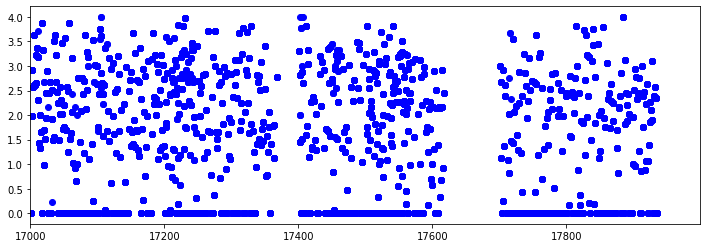

In [14]:
#Problem 3
#Visualiza Data of Fall 2017 Semester of all Department's Roll No of 17 Batch
fig, ax = plt.subplots(1, 1,figsize=(12,4))
sNo=list(data["SrNo"])
sem=list(data["Semester"])
ccode=list(data["CourseCode"])
course=list(data["CourseTitle"])
cHours=list(data["CreditHours"])
grades=list(data["Grade"])
gPoint=list(data["GradePoint"])
sgpa=list(data["SGPA"])
cgpa=list(data["CGPA"])
warning=list(data["Warning"])

specGPA=[]
specSrNo=[] 
for i in range(0,data.shape[0]):
    if (sem[i]=="Fall 2017"):
        specGPA.append(cgpa[i])
        specSrNo.append(sNo[i])

ax.set_xlim([17000,17999])
ax.scatter(y = specGPA,x =specSrNo ,color="blue")


In [15]:
#Problem 4
w=data.groupby(["Semester","SrNo","SGPA","CGPA","Warning"])['CourseTitle'].apply(",".join).reset_index()
#data.groupby(["Semester","SrNo"])['CourseTitle'].apply(list)

SemArr=["Fall 2016","Spring 2017",'Summer 2017',
        'Fall 2017','Spring 2018','Summer 2018',
        'Fall 2018','Spring 2019','Summer 2019']
NextCourses= pd.Series([]) 
Semester1= pd.Series([]) 

for i in range(w.shape[0]): 
    if w["Semester"][i] == "Fall 2016": 
        Semester1[i] = 0
        
    elif w["Semester"][i] == "Spring 2017": 
        Semester1[i]= 1
    elif w["Semester"][i] == "Summer 2017": 
        
        Semester1[i] = 2
        
    elif w["Semester"][i] == "Fall 2017": 
       
       Semester1[i] = 3
        
    elif w["Semester"][i] == "Spring 2018": 
        Semester1[i] = 4
        
    elif w["Semester"][i] == "Summer 2018": 
        Semester1[i] = 5
        
    elif w["Semester"][i] == "Fall 2018": 
        Semester1[i] = 6
        
    elif w["Semester"][i] == "Spring 2019":  
        Semester1[i] = 7
        
    elif w["Semester"][i] == "Summer 2019":  
        Semester1[i] = 8
        
    else:
        Semester1[i] = 9

w.insert(5, "Semester1", Semester1) 
w=w.drop(['Semester'], axis = 1) 

#w.loc[(w['Semester'] == SemArr[3]) & (w['SrNo']==17308), 'NextCourses'].iloc[0]
w=w[['Semester1','SrNo','SGPA','CGPA','Warning','CourseTitle']]
w

w=normalize(w)
w.tail(500)

,Semester1,SrNo,SGPA,CGPA,Warning,CourseTitle
10057,0.555556,0.124237,0.7500,0.6625,0.000000,Computer Programming Lab
10058,0.555556,0.124792,0.5825,0.5675,0.000000,"Programming Fundamentals,Programming Fundament..."
10059,0.555556,0.125069,0.9175,0.7175,0.000000,Multivariable Calculus
10060,0.555556,0.128120,0.8325,0.5675,0.000000,Multivariable Calculus
10061,0.555556,0.132557,0.7500,0.6175,0.000000,Multivariable Calculus
10062,0.555556,0.132834,0.5625,0.5425,0.000000,"Database Systems,Operating Systems,Database Sy..."
10063,0.555556,0.133666,0.1875,0.4725,1.000000,"Computer Programming,Computer Programming Lab"
10064,0.555556,0.138658,0.5225,0.5900,0.000000,"Digital Logic Design,Digital Logic Design - Lab"
10065,0.555556,0.139212,0.5950,0.5375,0.666667,Differential Equations
10066,0.555556,0.140599,0.3325,0.6250,0.000000,Multivariable Calculus


In [24]:
feature_columns=['Semester1','SrNo','SGPA','CGPA','Warning']
X = w[feature_columns].values
Y = w['CourseTitle'].values
le = preprocessing.LabelEncoder()
#print(X)
#print(Y)
Y= le.fit_transform(Y)


k=0.9*X.shape[0]
i=int(k)
Xtrain=X[:i]
Ytrain=Y[:i]



rNo= float(input("Enter Roll Number : "))
sem= float(input("Enter Semester : "))
sgpa= float(input("SGPA:  "))
cgpa=float(input("CGPA:  "))

warning=float(input("Choose Warning:  "))
#0.888889	0.809484	0.0000	0.5150	0.000000
#0.888889	0.747920	0.6675	0.7225	0.000000	
#0.000000	0.000000	0.2050	0.2050	0.666667
#0.555556	0.132834	0.5625	0.5425	0.000000	
inputdata={
        'rNo': [rNo], 'sem': [sem], 'sgpa': [sgpa],' cgpa': [ cgpa], 'warning': [warning],
     }

inputdataDF=pd.DataFrame(inputdata)

#inputdataDF=normalize(inputdataDF)
Xtest=inputdataDF.values
print(Xtrain)
print(Xtest)
#Ytest=Y[i:]



#Xtest=X[i:]
#Ytest=Y[i:]
#print (("Training Data Set Dimensions="), Xtrain.shape)
#print (("Training True Class labels dimensions"), Ytrain.shape)
#print (("Test Data Set Dimensions="), Xtest.shape)
#print (("Test True Class labels dimensions"), Ytest.shape)   



Enter Roll Number : 0.000000
Enter Semester : 0.000
SGPA:  0.2050
CGPA:  0.2050
Choose Warning:  0.666667
[[0.00000000e+00 0.00000000e+00 2.05000000e-01 2.05000000e-01
  6.66666667e-01]
 [0.00000000e+00 5.54631170e-04 8.17500000e-01 8.17500000e-01
  0.00000000e+00]
 [0.00000000e+00 8.31946755e-04 9.32500000e-01 9.32500000e-01
  0.00000000e+00]
 ...
 [7.77777778e-01 7.01053799e-01 9.45000000e-01 9.45000000e-01
  0.00000000e+00]
 [7.77777778e-01 7.01331115e-01 3.50000000e-01 4.37500000e-01
  0.00000000e+00]
 [7.77777778e-01 7.01331115e-01 7.77500000e-01 6.97500000e-01
  0.00000000e+00]]
[[0.       0.       0.205    0.205    0.666667]]


In [27]:
Knearest=KNN(2)
Knearest.train(Xtrain,Ytrain)
m=Knearest.predict(Xtest)
print(m)

#acc=Knearest.evaluate(m,Ytest)
#print(acc)

['Introduction to Computing,Basic Electronics,Calculus - I,Linear Algebra,Introduction to Computing Lab,English Language Lab,English Language']
